In [161]:
import numpy as np; import matplotlib.pyplot as plt
import astropy.constants as c; import astropy.units as u
from scipy.optimize import bisect;from scipy.integrate import odeint

### Problem 1 ###

In polar coordinate the equation of motion of stellar orbit is that: 
$$\ddot{r}-r \dot{\psi}^{2}=-\frac{d \Phi}{d r}$$
$$r^{2} \dot{\psi}=L(\text { constant })$$
By Integration:
$$
\frac{\dot{r}^{2}}{2}+\frac{L^{2}}{2 r^{2}}+\Phi(r)=E(\text { constant })
$$

If $\dot{r}=0$,we get the equations for boundaries of r
$$ 
\frac{L^{2}}{2 r^{2}}+\Phi(r)=E
$$

$$
\frac{L^{2}}{2 r^{2}}+V^2\ln(r)=E
$$

We could get the energy from the initial condition
$$
E = \frac{1}{2}(v_t^2+v_r^2)+V^2\ln(r)
$$

We plot $\frac{L^{2}}{2 r^{2}}+V^2\ln(r)-E$ versus the radius r. We see that for star's orbit the maximum radius is between 10kpc and 12kpc, and the mimimum radius is between 2kpc and 4kpc. Then we get the maximum and minimum radius using bisection method.  

The  maximum and minimum values of r for the star's orbit is 10.42kpc and 3.05kpc.

Text(0, 0.5, 'f [km$^2$/s$^2$]')

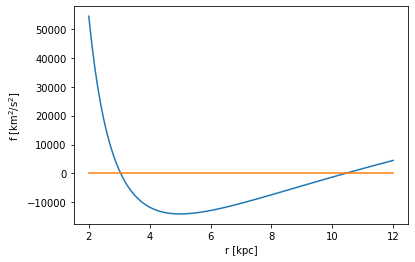

In [144]:
vt = 100; vr=50
V = 200 # velocity in km/s
r0 = 10 # radius in kpc
L = r0*vt # angular momentum

E = (vt**2+vr**2)/2+V**2*np.log(r0) # energy

def f(r):
    return L**2/(r)**2/2 + V**2*np.log(r)-E


r = np.linspace(2,12,102)
plt.plot(r,f(r))
plt.plot(r,[0]*102)
plt.xlabel('r [kpc]');plt.ylabel('f [km$^2$/s$^2$]')

In [145]:
rmin = bisect(f, 2, 4)
rmax = bisect(f, 10, 12)

print(rmin, rmax)

3.0500565807724342 10.419752943043932


### Problem 2

We use odeint to solve the below equations of motion numerically.

$$\ddot{r}-r \dot{\phi}^{2}=-\frac{d \Phi}{d r}$$
$$r^{2} \dot{\phi}=L$$

We modify our differiential equation as the form below, with potential $\Phi = V^2\ln(r)$ 

$$\dot{r} = v $$
$$\dot{\phi} = \frac{L}{r^2}$$
$$\dot{v} = r\dot{\phi}^2-\frac{d \Phi}{d r} = \frac{L^2}{r^3} - \frac{V^2}{r} $$

The initial condition we set is $r(t=0)=10kpc$, $v(t=0)=50km/s$ and $\phi(t=0) = 0$.

We do the numerical solving until its third apogalacticon (maximum r).

Note that in the code below we use the dimensionless version of the equation of motion. Which we scale our length by l=1kpc, my speed by v=100km/s, time by $\tau=\frac{1kpc}{100km/s}\approx 9.78Myr$ and angular momentum by $L = vl = 100 kpc\cdot km/s$. 

In [146]:
tau = (0.01*u.kpc/u.km*u.s).to(u.Myr)
tau

<Quantity 9.77792222 Myr>

In [168]:
# parameter
vt = 1; vr=0.5 
V = 2 # velocity in 100 km/s
r0 = 10 #in kpc
L = r0*vt # angular momentum

t = np.linspace(0, 33, 10001)

#inital condition 
y0 = [r0, vr, 0]

def orbit(y, t, V, L):
    r,v,phi = y
    dydt = [v, L**2/r**3-V**2/r, L/r**2]
    return dydt


y = odeint(orbit, y0, t, args=(V,L))

r = y[:,0]; v = y[:,1]; phi = y[:,2]

i)

We plot the orbit on its own plane below.

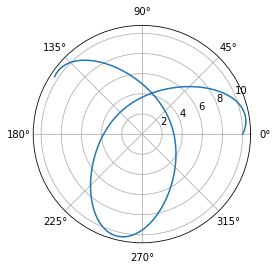

In [148]:
plt.polar(phi, r)

ii)

The plot of r versus t is shown below.

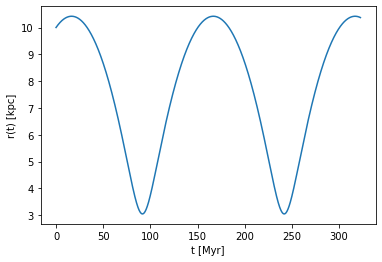

In [149]:
plt.plot(t*tau, r)
plt.xlabel('t [Myr]');plt.ylabel('r(t) [kpc]')
plt.show()

iii)

At apogalactica, the radius reach its maximum, we use np.where to find index and angle of apogalactica and then calculate the angular distance from the angle of successive apogalactica.

The angular distance between successive apogalactica is  4.32 rad.

In [153]:
index = np.where(abs(r-np.max(r))<0.000003)
print('index of apogalactica:',index)
print('these index correspond to time of:',t[index])
print('these index correspond to angle of:',phi[index])

index of apogalactica: (array([ 509,  510,  511, 5167, 5168, 9825], dtype=int64),)
these index correspond to time of: [ 1.6797  1.683   1.6863 17.0511 17.0544 32.4225]
these index correspond to angle of: [0.15902577 0.15932972 0.15963367 4.47425913 4.47456308 8.78949247]


In [151]:
ang_dis = phi[5168]-phi[510]
print('The angular distance between successive apogalactica is %.2f rad'%ang_dis)

The angular distance between successive apogalactica is 4.32 rad


In [155]:
4.32/(17.0544-1.683)

0.28104141457512

In [171]:
(0.015/24*c.M_sun*c.c**2).to(u.J)

<Quantity 1.11697036e+44 J>

iv) 

The apo- and perigalactic distance I get from the code below is 10.42kpc and 3.05kpc, which agrees with our estimates in 1.a)

In [152]:
rmax = np.max(r)
rmin = np.min(r)
print('The apo- and perigalactic distance is %.2f kpc and %.2f kpc'%(rmax, rmin))

The apo- and perigalactic distance is 10.42 kpc and 3.05 kpc


v)

The formula of energy is:

$\frac{\dot{r}^{2}}{2}+\frac{L^{2}}{2 r^{2}}+\Phi(r)=E$

$\frac{\dot{r}^{2}}{2}+\frac{L^{2}}{2 r^{2}}+V^2\ln(r)=E$

We check whether the energy is conserved from the code below. We plot energy versus time and we see that the energy fluctuate around $9.83534 \cdot 10^4 \frac{km^2}{s^2}$, due to extreme tiny numerical error. Hence we could state that the energy is conserved to a few decimal places. 

Note that the energy is scaled by $v^2 = 1\cdot10^4 km^2/s^2$ from our above scaling.

Text(0, 0.5, 'E(t) [km$^2$/s$^2$]')

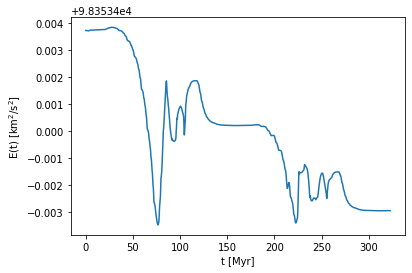

In [140]:
E = v**2/2+L**2/2/r**2+V**2*np.log(r)
E = E*(100*u.km/u.s)**2
plt.figure(1)
plt.plot(t*tau,E)
plt.xlabel('t [Myr]');plt.ylabel('E(t) [km$^2$/s$^2$]')

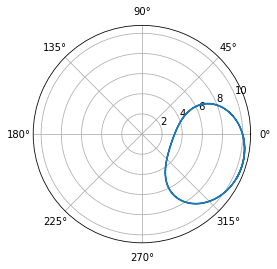

In [169]:
w = 4.32/(17.0544-1.683)
plt.polar(phi-w*t, r)